✅ Saved black_region_diff.png


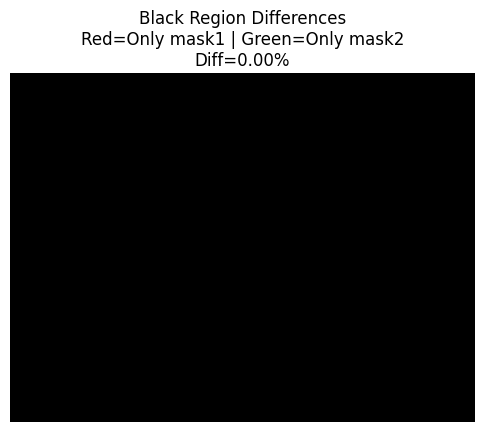


=== Results ===
Total black pixels (ROI): 46973
Different pixels (inside black): 0
Percentage difference (black areas only): 0.00%


In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def compare_black_regions(mask1_path, mask2_path, show_diff=True, save_diff=False):
    # === Load masks ===
    mask1 = cv2.imread(mask1_path, cv2.IMREAD_GRAYSCALE)
    mask2 = cv2.imread(mask2_path, cv2.IMREAD_GRAYSCALE)

    if mask1 is None or mask2 is None:
        raise FileNotFoundError("One or both mask files could not be loaded.")

    # === Resize second mask to match the first ===
    h1, w1 = mask1.shape
    h2, w2 = mask2.shape
    if (h1, w1) != (h2, w2):
        print(f"Resizing mask2: {w2}x{h2} → {w1}x{h1}")
        mask2 = cv2.resize(mask2, (w1, h1), interpolation=cv2.INTER_NEAREST)

    # === Invert to make black (0) → 1, white (255) → 0 ===
    mask1 = (mask1 < 128).astype(np.uint8)
    mask2 = (mask2 < 128).astype(np.uint8)

    # === Focus only on black areas (where mask1 or mask2 == 1) ===
    region_of_interest = np.logical_or(mask1, mask2)
    total_black_pixels = region_of_interest.sum()

    if total_black_pixels == 0:
        print("No black regions found in either mask.")
        return None, None

    # === Compute difference only inside black regions ===
    diff = np.logical_xor(mask1, mask2)
    different_pixels = np.logical_and(diff, region_of_interest).sum()
    percent_diff = (different_pixels / total_black_pixels) * 100

    # === Visualization (black background only) ===
    if show_diff or save_diff:
        color_diff = np.zeros((h1, w1, 3), dtype=np.uint8)
        color_diff[(mask1 == 1) & (mask2 == 0)] = [0, 0, 255]   # Red - only in mask1
        color_diff[(mask1 == 0) & (mask2 == 1)] = [0, 255, 0]   # Green - only in mask2

        if save_diff:
            cv2.imwrite("black_region_diff.png", color_diff)
            print("✅ Saved black_region_diff.png")

        if show_diff:
            plt.figure(figsize=(6,6))
            plt.imshow(cv2.cvtColor(color_diff, cv2.COLOR_BGR2RGB))
            plt.title(f"Black Region Differences\nRed=Only mask1 | Green=Only mask2\nDiff={percent_diff:.2f}%")
            plt.axis("off")
            plt.show()

    print(f"\n=== Results ===")
    print(f"Total black pixels (ROI): {total_black_pixels}")
    print(f"Different pixels (inside black): {different_pixels}")
    print(f"Percentage difference (black areas only): {percent_diff:.2f}%")

    return percent_diff, total_black_pixels


# === Run directly ===
if __name__ == "__main__":
    mask1_path = "IMG_0834_MASK.jpg"
    mask2_path = "IMG_0834_MASK.jpg"

    compare_black_regions(mask1_path, mask2_path, show_diff=True, save_diff=True)
